<a href="https://colab.research.google.com/github/mahhhdy/SBU_DataMining_Python/blob/main/Exercise_2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#initialize libs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from google.colab import drive
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.decomposition import PCA

drive.mount('/content/drive')
path='/content/drive/MyDrive/DataSets/immo_data.csv'
pd.set_option('display.max_columns',None)
df= pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.info()
# df.shape
# df.livingSpace.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

#delete column with more than 50% null value

In [ ]:
# df.columns[((df.isna().sum()/len(df))>0.5)]
df = df.drop(columns=df.columns[((df.isna().sum()/len(df))>0.5)])
df.shape

(268850, 42)

#delete column with irrelevant value

In [ ]:
# picturecount,houseNumber,description,date,facilities,numberOfFloors,lift,regio2,regio3,streetPlain,firingTypes	,geo_bln	,geo_krs		
df.drop(columns=['picturecount','houseNumber','description','date','street','scoutId','facilities','numberOfFloors','lift','regio2','regio3','streetPlain','firingTypes','geo_bln','geo_krs'], inplace = True)

In [ ]:
df.shape

(268850, 27)

#fillna numeric column by mean 

In [ ]:
df.fillna(df._get_numeric_data().mean(),inplace=True)

replace zero value of all numeric columns with mean

In [ ]:
for cols in df.columns:
  if  df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
    df[cols].replace({
        0:df.livingSpace.mean()
        },inplace=True)

#fill string column with most popular value

In [ ]:
for cols in df.columns:
  if  df[cols].dtype == 'object' or df[cols].dtype == 'bool':
    df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

In [ ]:
# df.isna().sum()

#Delete outlier

In [ ]:
for cols in df.columns:
  if  df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
    upp_range = df[cols].mean() + 3 * df[cols].std()
    low_range = df[cols].mean() - 3 * df[cols].std()

    indexs = df[(df[cols]>upp_range) | (df[cols]<low_range)].index
    df=df.drop(indexs)

In [ ]:
df.livingSpace.describe()
df.livingSpace.mean()

73.9843479041628

#change object, category and bool value to int

In [ ]:
tmp3 = df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')| (df.dtypes == 'bool')].index.tolist()
# df[tmp3].head()

In [ ]:
for cols in df.columns:
  if  df[cols].dtype == 'bool':
    df[cols] = df[cols].astype(int)

In [ ]:
df.interiorQual.replace({
    'normal':1,
    'sophisticated':2,
    'simple':3,
    'luxury':4
},inplace=True)

In [ ]:
df.regio1.replace({
    'Nordrhein_Westfalen':1,
    'Rheinland_Pfalz':2,
    'Sachsen':3,
    'Bremen':4,
    'Schleswig_Holstein':5,
    'Baden_Württemberg':6,
    'Thüringen':7,
    'Hessen':8,
    'Niedersachsen':9,
    'Bayern':10,
    'Hamburg':11,
    'Sachsen_Anhalt':12,
    'Mecklenburg_Vorpommern':13,
    'Berlin':14,
    'Brandenburg':15,
    'Saarland':16
},inplace=True)

In [ ]:
df.condition.replace({
    'well_kept':1,
    'refurbished':2,
    'first_time_use':3,
    'fully_renovated':4,
    'mint_condition':5,
    'first_time_use_after_refurbishment':6,
    'modernized':7,
    'negotiable':8,
    'need_of_renovation':9,
    'ripe_for_demolition':10
},inplace=True)

In [ ]:
df.petsAllowed.replace({
    'no':1,
    'yes':2,
    'negotiable':3
},inplace=True)

In [ ]:
df.typeOfFlat.replace({
    'other':0,
    'ground_floor':1,
    'apartment':2,
    'roof_storey':3,
    'raised_ground_floor':4,
    'terraced_flat':5,
    'half_basement':6,
    'maisonette':7,
    'penthouse':8,
    'loft':9
},inplace=True)

In [ ]:
df.heatingType.replace({
    'central_heating':1,
    'self_contained_central_heating':2,
    'floor_heating':3,
    'district_heating':4,
    'gas_heating':5,
    'oil_heating':6,
    'wood_pellet_heating':7,
    'electric_heating':8,
    'combined_heat_and_power_plant':9,
    'heat_pump':10,
    'night_storage_heater':11,
    'stove_heating':12,
    'solar_heating':13
},inplace=True)

In [ ]:
df.telekomTvOffer.replace({
    'NONE':0,
    'ONE_YEAR_FREE':1,
    'ON_DEMAND':2
},inplace=True)

In [ ]:
# df.head()

#Data Visualization

extract correlation bethween columns

In [ ]:
corr = df.corr().abs()
corr.livingSpace.sort_values(ascending=False)

livingSpace             1.000000
livingSpaceRange        0.950518
noRooms                 0.774535
noRoomsRange            0.756667
baseRent                0.688948
baseRentRange           0.688015
serviceCharge           0.686818
totalRent               0.606005
interiorQual            0.291356
typeOfFlat              0.268185
balcony                 0.246555
yearConstructedRange    0.172289
pricetrend              0.147131
newlyConst              0.142874
geo_plz                 0.136545
condition               0.093735
heatingType             0.084964
thermalChar             0.078619
hasKitchen              0.077474
yearConstructed         0.077465
garden                  0.070534
cellar                  0.054750
floor                   0.024936
telekomUploadSpeed      0.011529
telekomTvOffer          0.011052
regio1                  0.010377
petsAllowed             0.005581
Name: livingSpace, dtype: float64

feature with the most realtion with 'living space' feature
*   serviceCharge           
*   totalRent               
*   baseRent               
*   noRooms                             
*   livingSpaceRange       

extract column with correlation more than 0.5

In [ ]:
corr = df.corr().abs()
m = ~(corr.mask(np.eye(len(corr), dtype=bool)) > 0.5).any()
m

regio1                   True
serviceCharge           False
heatingType              True
telekomTvOffer           True
newlyConst              False
balcony                  True
pricetrend               True
telekomUploadSpeed       True
totalRent               False
yearConstructed         False
hasKitchen               True
cellar                   True
yearConstructedRange    False
baseRent                False
livingSpace             False
condition                True
interiorQual             True
petsAllowed              True
baseRentRange           False
typeOfFlat               True
geo_plz                  True
noRooms                 False
thermalChar              True
floor                    True
noRoomsRange            False
garden                   True
livingSpaceRange        False
dtype: bool

show heatmap plot for column with correlation more than 0.5

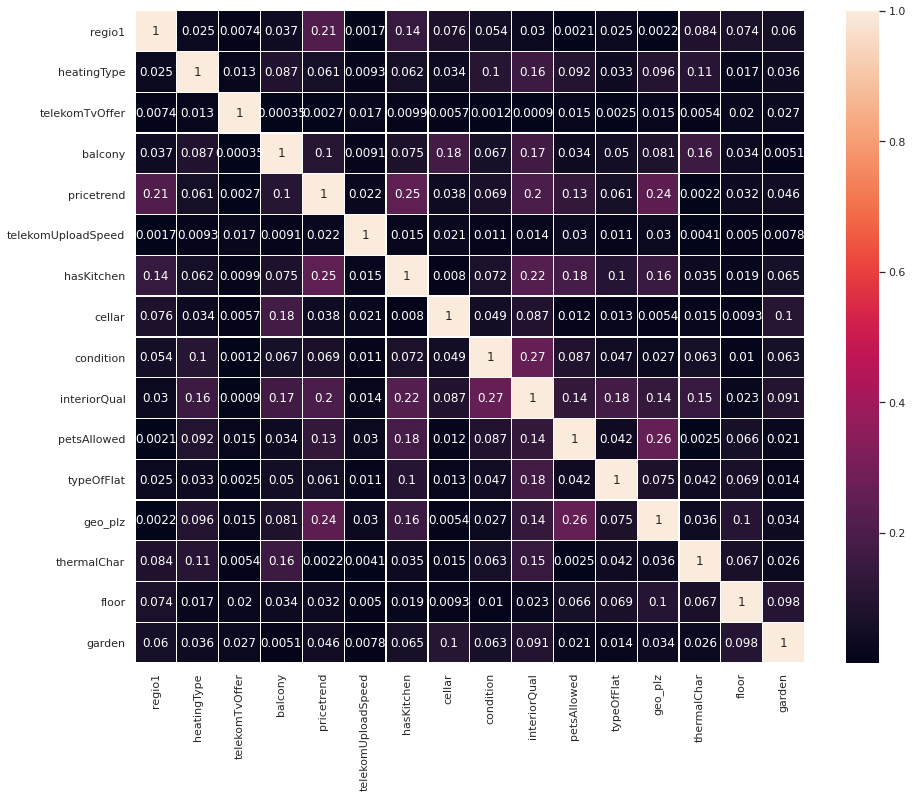

In [ ]:
raw = corr.loc[m, m]
raw

plt.figure(figsize=(15, 12))
sns.heatmap(raw, 
            linewidths=0.3, 
            annot=True);

#implementation hypothesis testing

Test 'living space' feature for normal distribution


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


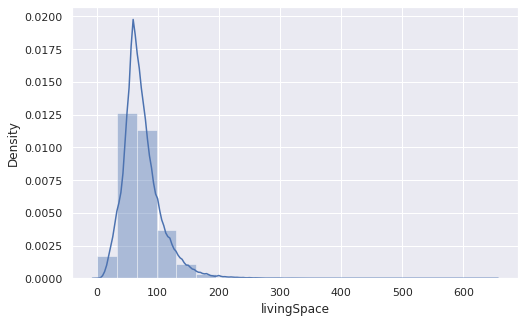

In [ ]:
sns.set(rc={'figure.figsize':(8,5)})
sns.distplot(df['livingSpace'],kde_kws={"label":'livingSpace'},bins=20)
# sns.distplot(df['livingSpace'],bins=30)

we got that the living space distribution doesnt have a normal distributiion. \\

*   Skewness is a measure of symmetry. skewed mean it lacks symmetry.
*   Kurtosis is a measure whether the data distribution is right-tailed or left-tailed relative to the normal distribution. -ve values for skewness shows the data distribution is skewed to left and +ve value indicate skewd to right.





In [ ]:
print("Skewness of living space Distribution is : {:.4f}"
      .format(df.livingSpace.skew()))

print("Kurtosis of livi ng space Distribution is : {:.4f}"
      .format(df.livingSpace.kurt()))

Skewness of living space Distribution is : 1.7016
Kurtosis of livi ng space Distribution is : 7.1163


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


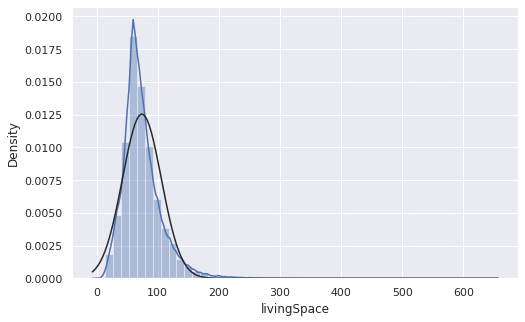

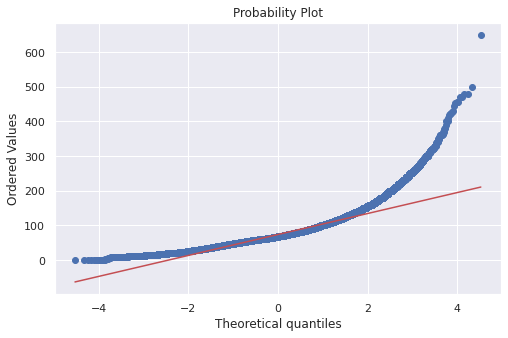

In [ ]:
sns.distplot(df.livingSpace, fit = norm);
fig = plt.figure()
res = stats.probplot(df.livingSpace, plot = plt);

livig price doesnt fellow normal distribution. \\
Therefor, we need to trasform the living space data into normally distributed. \\
One method that we can use to transform the skewed living space distribution to normal distribution is the log transformation

normal test for 'living space' feature

In [ ]:
stats.normaltest(df.livingSpace)

NormaltestResult(statistic=88615.83094955127, pvalue=0.0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


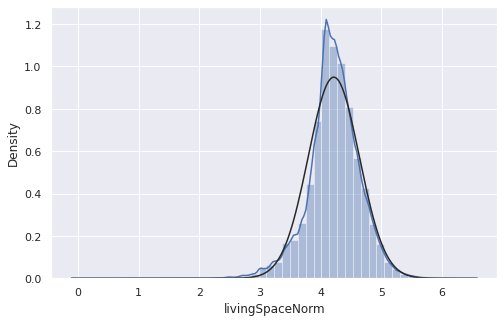

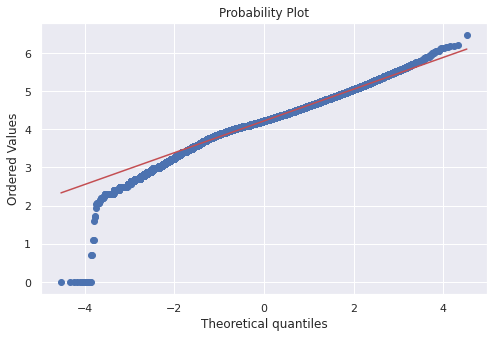

In [ ]:
# stats.normaltest(np.log10(df['livingSpace']))

df["livingSpaceNorm"] = np.log(df["livingSpace"]) 
sns.distplot(df['livingSpaceNorm'], fit = norm);
fig = plt.figure()
res =stats.probplot(df['livingSpaceNorm'], plot = plt);

In [ ]:
stats.normaltest(np.log(df['livingSpace']))

NormaltestResult(statistic=14701.213681654455, pvalue=0.0)

In [ ]:
stats.normaltest(1/df['livingSpace']) 

NormaltestResult(statistic=679108.3370138104, pvalue=0.0)

In [ ]:
stats.normaltest(df['livingSpace']**2) 

NormaltestResult(statistic=300965.96721504687, pvalue=0.0)

spearman rank correlation for living space with 3 feature

In [ ]:
stats.stats.spearmanr(df['livingSpace'],df['totalRent'])

SpearmanrResult(correlation=0.6679811426567324, pvalue=0.0)

In [ ]:
stats.stats.spearmanr(df['livingSpace'],df['baseRent'])

SpearmanrResult(correlation=0.712661518469898, pvalue=0.0)

In [ ]:
stats.stats.spearmanr(df['livingSpace'],df['noRooms'])

SpearmanrResult(correlation=0.7881986105498997, pvalue=0.0)

Anova Test

In [ ]:
F, p = stats.f_oneway(df['livingSpace'], df['baseRent'], df['noRooms'])
print("p-value for significance is: ", p)

p-value for significance is:  0.0


In [ ]:
F, p = stats.f_oneway(df['livingSpace'], df['baseRent'])
print("p-value for significance is: ", p)

p-value for significance is:  0.0


T Test

In [ ]:
F, p = stats.ttest_rel(df['livingSpace'], df['baseRent'])
print("p-value for significance is: ", p)

p-value for significance is:  0.0


chi-squared test

In [ ]:
stats.chi2_contingency(df[['totalRent','serviceCharge']])

(5254306.221282395, 0.0, 230489, array([[ 918.59171241,  166.40828759],
        [ 876.54097262,  158.79054893],
        [1316.5070164 ,  238.4929836 ],
        ...,
        [ 973.62255232,  176.37744768],
        [1007.48768458,  182.51231542],
        [1029.78069607,  186.55082548]]))

#using PCA for reduction of feature

splite target and feature

In [ ]:
# pca = PCA(0.9)
# x_pca = pca.fit_transform(x)
# x_pca.shape

#Implementation Regression Without package

In [ ]:
y=df['livingSpace'].values
x=df.drop(columns= ['livingSpace']).values

print(x.shape)
print(y.shape)

(230490, 27)
(230490,)


In [ ]:
train_size = int(0.8 * x.shape[0])
train_size

184392

In [ ]:
x_train = x[:train_size]
y_train = y[:train_size]

print(x_train.shape)
print(y_train.shape)

x_test = x[train_size:]
y_test = y[train_size:]

print(x_test.shape)
print(y_test.shape)

x_train[:,0].shape

# print("x",x_test)
# print("y",y_test)

(184392, 27)
(184392,)
(46098, 27)
(46098,)


(184392,)

In [ ]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
hasKitchen              0
cellar                  0
yearConstructedRange    0
baseRent                0
livingSpace             0
condition               0
interiorQual            0
petsAllowed             0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
noRoomsRange            0
garden                  0
livingSpaceRange        0
livingSpaceNorm         0
dtype: int64

#Regression Without package

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(27)
n = x_train.shape[0]

# print("b:  ",b)
# print("w:  ",w)
# print("n:  ",n)

lr = 0.00000000001

n_epochs = 800

test_error =  y_test - np.sum((w * x_test) + b , axis = 1)

test_mse = (test_error**2).mean()           
# print('init MSE : ',test_mse)
              
for epoch in range(n_epochs):
    error = y_train - np.sum((w * x_train) + b , axis = 1)
    
    if epoch % 100 == 0:    
        print('epoch {} , MSE : {}'.format(epoch,(error**2).mean()))
    
    w_grad = [0] * x_train.shape[1]
    b_grad = 0
    
    for i in range(x_train.shape[1]):
        w_grad[i] = -1 * (x_train[:,i] * error).mean()
        w[i] = w[i] - (lr * w_grad[i])
        
    b_grad = -1 * error.mean()
    b = b - (lr*b_grad)
              

# test_error = y_test - np.sum((w * x_test) + b , axis = 1)
# test_mse = (test_error**2).mean() 
# print('Final MSE : ',test_mse)

epoch 0 , MSE : 4555670139.06267
epoch 100 , MSE : 53306839.7375197
epoch 200 , MSE : 1797634.0440363486
epoch 300 , MSE : 1205097.987801807
epoch 400 , MSE : 1195046.792935899
epoch 500 , MSE : 1191669.925738583
epoch 600 , MSE : 1188380.2210764152
epoch 700 , MSE : 1185102.287046369


#10-fild method

In [ ]:
def RMSLE10(model):
    kf = KFold(10, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

#5-fild method

In [ ]:
def RMSLE5(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return rmse

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(27)
n = x_train.shape[0]

y_pred = np.sum((w * x_test) + b , axis = 1)
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

# print(w)
# print(y_test)

,test,pred
0,125.45,92339.615662
1,74.16,86627.249383
2,128.00,80101.783417
3,76.00,104779.069983
4,52.80,64401.421054


Accuracy With out Package regression

In [ ]:
temp['upper_range'] = temp['test'] * 1.1
temp['lower_range'] = temp['test'] * 0.9

temp[(temp['upper_range'] >=temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

0.021692915093930322

#Initial regression libs

In [ ]:
from sklearn.linear_model import LinearRegression , Ridge, Lasso
from sklearn.metrics import mean_squared_error
Linear = LinearRegression()

#Implementation with linear Regression package

In [ ]:
lr=Linear.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)

# y_pred_lr = np.exp(lr.predict(x_test))
# lr_score = lr.score(x_train, y_train)*100

rmse5 = RMSLE5(lr).mean()
rmse10 = RMSLE10(lr).mean()
print(rmse5)
print(rmse10)

[ 2.68267966e-02  2.20728614e-02  3.99930771e-03 -3.15473470e-01
 -1.51991621e+00 -4.95965245e-01 -1.65943601e-01 -6.84796275e-03
  7.22128083e-04 -3.15134529e-03  5.05422600e-01 -1.09121337e+00
 -7.31147628e-04  1.08258546e-02 -1.14416112e-02  3.04422414e-01
 -8.87986733e-02 -1.57516161e+00  3.76954182e-01 -5.19026221e-06
  1.03504792e+01 -8.67869786e-04 -1.26944288e-01 -9.46607628e+00
  2.33940624e-01  1.08928763e+01  2.90872625e+01]
-82.78257982473187
7.601871036233857
7.56729863346641


MSE With Package regression

In [ ]:
y_pred = Linear.predict(x_test)
mean_squared_error(y_pred,y_test)

51.24166438594569

In [ ]:
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,125.45,130.844662
1,74.16,72.157866
2,128.00,122.677047
3,76.00,73.651761
4,52.80,50.293050


Accuracy With Package regression

In [ ]:
temp['upper_range'] = temp['test'] * 1.1
temp['lower_range'] = temp['test'] * 0.9

temp[(temp['upper_range'] >= temp['pred']) & (temp['pred'] >= temp['lower_range'])].shape[0] * 100/temp.shape[0]

81.52848279751834

#Implementation with Ridge Regression package

In [ ]:
alphas = [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 75, 100]
for alpha in alphas:
    rg = Ridge(alpha = alpha)
    rg.fit(x_train, y_train)
    rg_score = rg.score(x_train, y_train)
    rmse5 = RMSLE5(rg).mean()
    # rmse10 = RMSLE10(rg).mean()
    print("For alpha = {} the Ridge model accuracy score = {:.2f} and  mean rmse5 = {:.3f}"
          .format(alpha, rg_score*100, rmse5))

print(rmse5)


for alpha in alphas:
    rg = Ridge(alpha = alpha)
    rg.fit(x_train, y_train)
    rg_score = rg.score(x_train, y_train)
    rmse10 = RMSLE10(rg).mean()
    # rmse10 = RMSLE10(rg).mean()
    print("For alpha = {} the Ridge model accuracy score = {:.2f} and  mean rmse10 = {:.3f}"
          .format(alpha, rg_score*100, rmse10))

print(rmse10)

For alpha = 0.001 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 0.01 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 0.1 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 1 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 5 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 10 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 20 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 50 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 75 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.603
For alpha = 100 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.603
7.603207508242678
For alpha = 0.001 the Ridge model accuracy score = 94.44 and  mean rmse10 = 7.567
For alpha = 0.01 the Ridge model accuracy score = 94.44 and  mean rmse10 = 7.567
For alpha = 0.1 the Ridge model ac

In [ ]:
temp = pd.DataFrame({'test':y_test,'pred':y_pred})
temp.head()

,test,pred
0,125.45,130.844662
1,74.16,72.157866
2,128.00,122.677047
3,76.00,73.651761
4,52.80,50.293050


MSE With Ridge Package regression \\
Accuracy With Ridge Package regression

In [ ]:
alpha = 10
rg = Ridge(alpha = alpha)
rg.fit(x_train, y_train)
y_pred_rg = np.exp(rg.predict(x_test))
rg_score = rg.score(x_train, y_train)
rmse5 = RMSLE5(rg).mean()
rmse10 = RMSLE10(rg).mean()
print("For alpha = {} the Ridge model accuracy score = {:.2f} and  mean rmse5 = {:.3f}"
          .format(alpha, rg_score*100, rmse5))
print("For alpha = {} the Ridge model accuracy score = {:.2f} and  mean rmse10 = {:.3f}"
          .format(alpha, rg_score*100, rmse10))
# print(y_pred_rg[:10])

For alpha = 10 the Ridge model accuracy score = 94.44 and  mean rmse5 = 7.602
For alpha = 10 the Ridge model accuracy score = 94.44 and  mean rmse10 = 7.567


#Implementation with lasso Regression package

In [ ]:
lasr = Lasso()
lasr.fit(x_train, y_train)
y_pred_lasr = np.exp(lasr.predict(x_test))
lasr_score = lasr.score(x_train, y_train)
print("Lasso Accuracy  score = {:.2f}".format(lasr_score*100))
RMSLE5(lasr)

Lasso Accuracy  score = 92.19


array([9.2730112 , 8.3657925 , 9.29276164, 8.62591619, 9.14773747])

MSE With lasso Package regression \\
Accuracy With lasso Package regression

In [ ]:
alpha = 0.001
lasr = Lasso(alpha = alpha)
lasr.fit(x_train, y_train)
y_pred_lasr = np.exp(lasr.predict(x_test))
lasr_score = lasr.score(x_train, y_train)
print("Lasso Accuracy score = {:.2f} at alpha = {}".format(lasr_score*100, alpha))
print("RMSE5 = {} ".format(RMSLE5(lasr)))
print("RMSE5 = {} ".format(RMSLE10(lasr)))

Lasso Accuracy score = 94.44 at alpha = 0.001
RMSE5 = [7.8186374  6.96915129 7.78720005 7.18957409 8.2449859 ] 
RMSE5 = [8.01011607 7.61579186 6.85750249 7.07311762 7.58724785 7.95608619
 6.95317544 7.39799318 8.57258661 7.64961217] 
